## **Análise Estatística: Salário de profissionais na área de Dados**

- Este projeto tem como objetivo aplicar técnicas de estatística descritiva em um conjunto de dados contendo informações sobre profissionais da área de dados ao redor do mundo. A ideia é utilizar ferramentas de análise exploratória e visualização para entender como diferentes fatores impactam o salário desses profissionais.

**Sobre os dados**

O dataset contém dados de salários de profissionais da área de dados de diversas partes do mundo. 
Entre as colunas disponíveis, temos:

**work_year**: Ano de referência do salário

**experience_level**: Nível de experiência (ex: EN = iniciante, MI = intermediário)

**employment_type**: Tipo de contrato (CLT, freelancer, etc.)

**job_title**: Cargo ocupado 

**salary_in_usd**: Salário anual em dólares

**employee_residence**: País de residência do profissional

**company_location**: Localização da empresa

**company_size**: Tamanho da empresa (P = pequena, M = média, L = grande)

#### **Setup**

In [117]:
#Data Wraling
import pandas as pd 
import numpy as np 

#Data visualization
import matplotlib.pyplot  as plt
import seaborn as sns

#Scipy
from scipy.stats import chi2_contingency

#Remove warning
import warnings

In [118]:
#Definindo o padrão das visualizações
sns.set_theme(
    style= 'whitegrid',
    font_scale= 1.1,
    rc= {'figure.figsize': (8, 6),       # Tamanho padrão das figuras
        'axes.titlesize': 16,            # Tamanho do título do gráfico
        'axes.titleweight': 'bold',      # Título do gráfico em negrito
        'axes.labelsize': 12,            # Tamanho dos rótulos dos eixos
        'axes.labelweight': 'bold',      # Rótulos dos eixos em negrito
        'xtick.labelsize': 10,           # Tamanho dos rótulos do eixo X (os números/categorias)
        'ytick.labelsize': 10,           # Tamanho dos rótulos do eixo Y (os números)
        'legend.fontsize': 10,           # Tamanho da fonte da legenda
        'lines.linewidth': 2,            # Largura padrão das linhas
        'axes.formatter.useoffset': False, # Evita notação científica para pequenos números
        'axes.formatter.limits': (-4, 4)   # Controla quando usar notação científica
        }
    )

#Removendo as warnings
warnings.filterwarnings('ignore')



### **Data Understanding**

In [119]:
#Load Data
df = pd.read_csv(r'C:\Users\Felipe\Desktop\CURSO DNC\CONTEÚDOS\ESTATÍSTICA\CASES\Data\Raw\salario_profissionais_dados.csv')

#Primeira linhas
df.head(5)

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


In [120]:
#Dimensão de dados 
df.shape

(3755, 10)

In [121]:
#Infos gerais(tipos de dados e dimensão)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [122]:
#Vericando nulos 
df.isna().sum()

work_year              0
country                0
region                 0
experience_level       0
job_title              0
salary_in_usd          0
employee_residence     0
company_location       0
company_size           0
years_of_experience    0
dtype: int64

In [123]:
#Dados unicos
df.nunique()

work_year                 4
country                  78
region                    5
experience_level          4
job_title                93
salary_in_usd          1035
employee_residence       78
company_location         72
company_size              3
years_of_experience      10
dtype: int64

In [124]:
#Dados duplicados
duplicados = df[df.duplicated()]
print(duplicados)

      work_year                   country    region experience_level  \
171        2023  United States of America  Americas               SE   
187        2023  United States of America  Americas               EN   
201        2023  United States of America  Americas               SE   
221        2023  United States of America  Americas               SE   
223        2023  United States of America  Americas               SE   
...         ...                       ...       ...              ...   
3439       2022  United States of America  Americas               MI   
3440       2022  United States of America  Americas               SE   
3441       2022  United States of America  Americas               SE   
3449       2022  United States of America  Americas               SE   
3575       2021  United States of America  Americas               SE   

           job_title  salary_in_usd employee_residence company_location  \
171    Data Engineer         145000                 US      

Analisando os dados duplicados: 

- Se tratam apenas de linhas que contém dados iguais em algumas colunas específicas como o mesmo cargo, país, salário etc.

In [125]:
#Definindo variáveis numéricas e categoricas 
num_cols = df.select_dtypes('number')
cat_cols = df.select_dtypes('object')

#### **Análise Univariada**

#### Variáveis Numéricas

**Medidas de tendencia central**

In [126]:
#Convertendo os valores que es~toa em notação cientifica
pd.options.display.float_format = '{:,.2f}'.format #converte para float 2 casas decimais

In [127]:
#Infos estatísticas 
num_cols.describe()

,work_year,salary_in_usd,years_of_experience
count,"3,755.00","3,755.00","3,755.00"
mean,"2,022.37","137,570.39",5.97
std,0.69,"63,055.63",2.06
min,"2,020.00","5,132.00",1.00
25%,"2,022.00","95,000.00",5.00
50%,"2,022.00","135,000.00",6.00
75%,"2,023.00","175,000.00",8.00
max,"2,023.00","450,000.00",10.00


In [128]:
#Estatísticas coluna Salário
df['salary_in_usd'].describe()

count     3,755.00
mean    137,570.39
std      63,055.63
min       5,132.00
25%      95,000.00
50%     135,000.00
75%     175,000.00
max     450,000.00
Name: salary_in_usd, dtype: float64

**Análise**

- A coluna que contém valores mais dispersos é a *Salário*, onde temos os o primeiro quartil tem valores que varian de $5k até $95k, além de valores extremos como podemos ver o valor máximo de $450k que é muito distante da média.

- A mesma também contém um desvio padrão alto de 63055 em relação a média de 137570, o que confirma que há dispersão dos dados.

- Embora há certa dispersão por conta de valores extremos, a média se destoa pouco da mediana, o que quer dizer que a maoria dos dados segue um padrão normal.

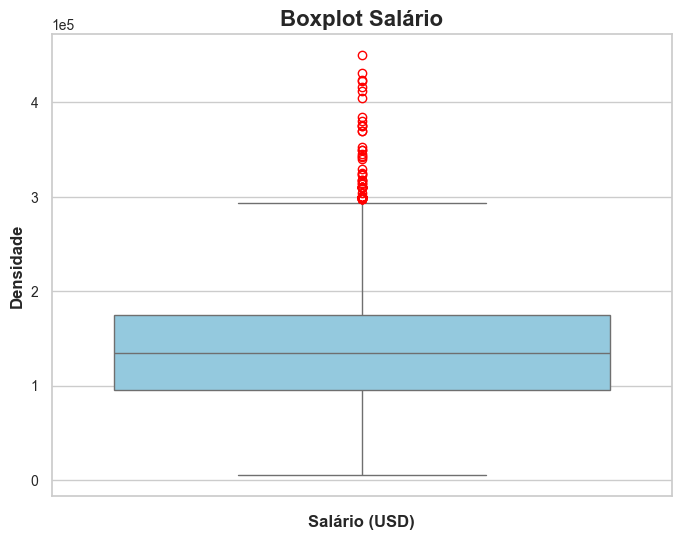

In [129]:
#Outliers de salário com boxplot 
sns.boxplot(df['salary_in_usd'], color= 'skyblue', flierprops = dict(
    marker = 'o', markeredgecolor = 'red'
))

# Títulos e eixos
plt.title('Boxplot Salário')
plt.xlabel('Salário (USD)')
plt.ylabel('Densidade')
plt.show()


**Medidas de distribuição**

Text(0, 0.5, 'Distribuição')

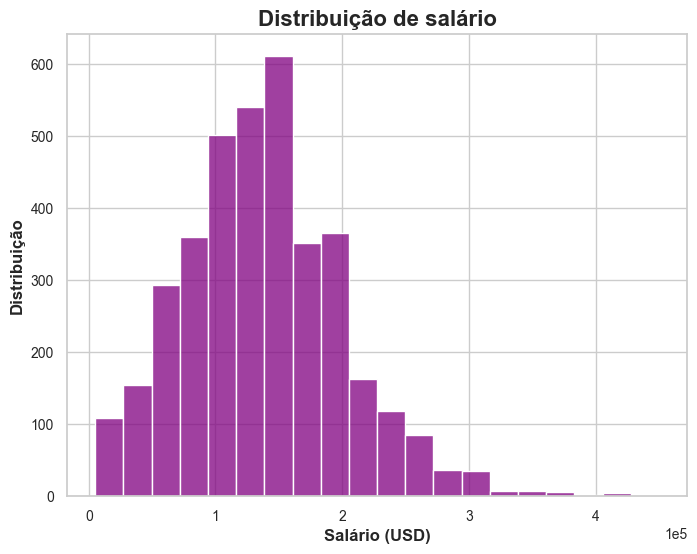

In [130]:
#Distriuição de salário
sns.histplot(data = df['salary_in_usd'], bins = 20, color = 'purple')

plt.title('Distribuição de salário')
plt.xlabel('Salário (USD)')
plt.ylabel('Distribuição')

**Análise da coluna de salários**

- A coluna salary_in_usd apresenta uma distribuição de valores com uma assimetria à direita. A maior parte dos salários está concentrada em uma faixa intermediária, mas a presença de um pequeno número de salários muito altos (outliers) puxa a média levemente para cima. No entanto, a média permanece próxima da mediana, confirmando que esses outliers não distorcem a representação da maioria dos dados. 

- Esses salários extremos representam uma pequena parcela de profissionais é robusta e é a principal conclusão tirada do boxplot e histograma.

- Com isso vamos optar por não remover esses outliers, visto que são poucos e que em nosso contexto de salários da área os mesmo são normais para alguns profissionais com alta bagagem.

Text(0, 0.5, 'Distribuilção')

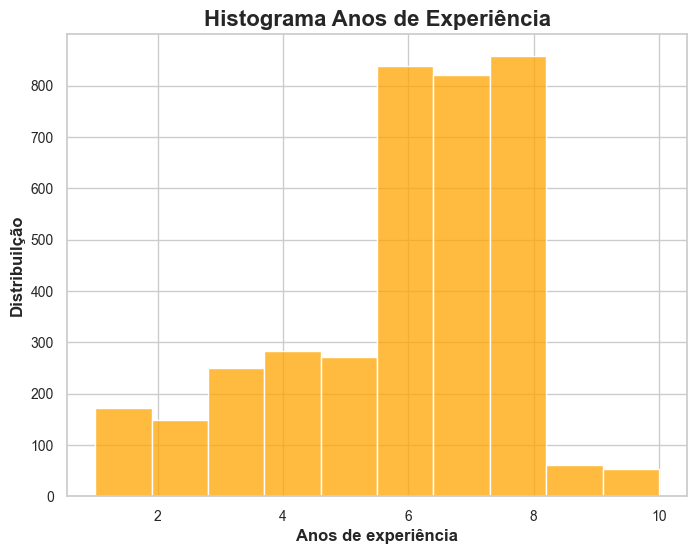

In [131]:
#Histograma anos de experiência
sns.histplot(df['years_of_experience'], bins = 10, color = 'orange')

#Titulo e eixos 
plt.title('Histograma Anos de Experiência')
plt.xlabel('Anos de experiência')
plt.ylabel('Distribuilção')

**Análise coluna Anos de Experiência**:

- Podemos ver na distribuição dos seus dados que o pico de anos de experiência geral se concentram entre 6 e 8 anos.

#### Variáveis Categóricas

In [132]:
#Moda das variáveis categóricas 
for col in cat_cols:
    mode = df[col].mode()[0] #[0] retira o valor de índice
    print(f'A moda de {col} é:', mode)
    

A moda de country é: United States of America
A moda de region é: Americas
A moda de experience_level é: SE
A moda de job_title é: Data Engineer
A moda de employee_residence é: US
A moda de company_location é: US
A moda de company_size é: M


In [133]:
#Distribuição de valores
cols_to_analyze = ['country','experience_level','job_title','company_size']

for col in cols_to_analyze:
    print(f'Distribuição relativa de valores em', col)
    values = df[col].value_counts(normalize= True,ascending= False).head(5)*100
    #Print com porcentagem
    for index, value in values.items():
        print(f'{index:<40s} {value:.2f}%')
    

Distribuição relativa de valores em country
United States of America                 80.00%
United Kingdom of Great Britain and Northern Ireland 4.45%
Canada                                   2.26%
Spain                                    2.13%
India                                    1.89%
Distribuição relativa de valores em experience_level
SE                                       67.00%
MI                                       21.44%
EN                                       8.52%
EX                                       3.04%
Distribuição relativa de valores em job_title
Data Engineer                            27.70%
Data Scientist                           22.37%
Data Analyst                             16.30%
Machine Learning Engineer                7.70%
Analytics Engineer                       2.74%
Distribuição relativa de valores em company_size
M                                        83.97%
L                                        12.09%
S                                   

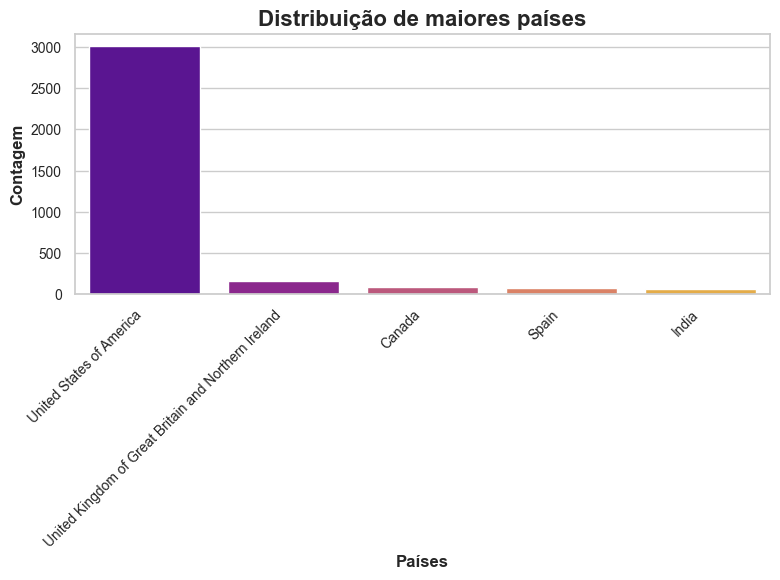

In [134]:
#Criando variável de Países
top_country = df['country'].value_counts(ascending=False).head(5)

#Gráfico de barras
ax = sns.barplot(top_country, palette= 'plasma')

#Título e eixos 
plt.title('Distribuição de maiores países')
plt.xlabel('Países')
plt.ylabel('Contagem')
#Alinhando os valores o eixo x
plt.xticks(rotation = 45, ha = 'right')

#Ajustando parametros
plt.tight_layout()
plt.show()



**Análise**:

- Podemos ver a a maioria dos profissionais em dados se concentram no Estados Unidos (USA), com cerca de 3.000 valores de contagem. 
  
- Os demais países tem uma distribuição muito abaixo, sendo o segundo com 167 registros.


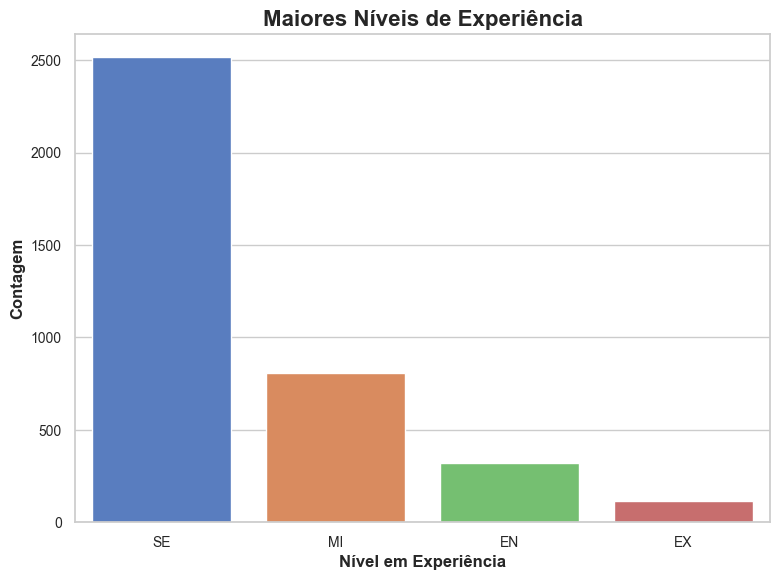

In [135]:
#Variável para as experiências
top_experience = df['experience_level'].value_counts(ascending= False)

#Gráfico de barras
sns.barplot(top_experience, palette= 'muted')

#Título e eixos 
plt.title('Maiores Níveis de Experiência')
plt.xlabel('Nível em Experiência')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()


**Análise Nível de Experiência**

- Na distribuições dos níveis de experiência podemos ver que SE (Executivo) se destaca em relação aos demais níveis, tendo cerca de 2500 resgitros 
no total em nossa base.

- Em segunda aparece MI (Intermediário) com cerca de 800 registros, seguido por EN (Inicantes) e SE (Senior).

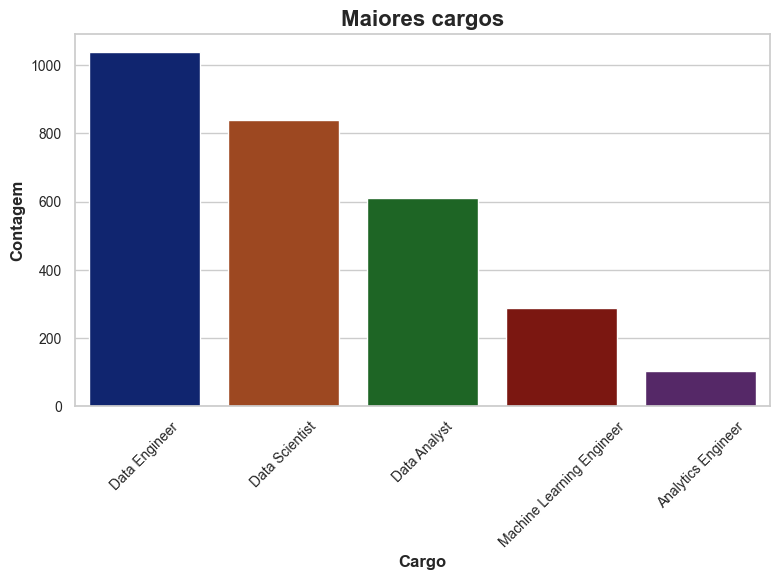

In [136]:
#Variável distribuição de cargos 
top_jobs = df['job_title'].value_counts(ascending= False).head(5)

#Gráfico de barras
sns.barplot(top_jobs, palette= 'dark')

#Títulos e eixos 
plt.title('Maiores cargos')
plt.xlabel('Cargo')
plt.ylabel('Contagem')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

**Análise distribuição de cargos**:

- O cargo mais presente em nossa base é o Data Enginner com cerca de 1040 registros, seguido por Data Scientist com cerca de 840 registros em nossa base.

- Os demais cargos, respectivamente, são Data Analyst com 612 registros, Machine Learning Engineer com 289 e Analytics Engineer com 103 resgistros.

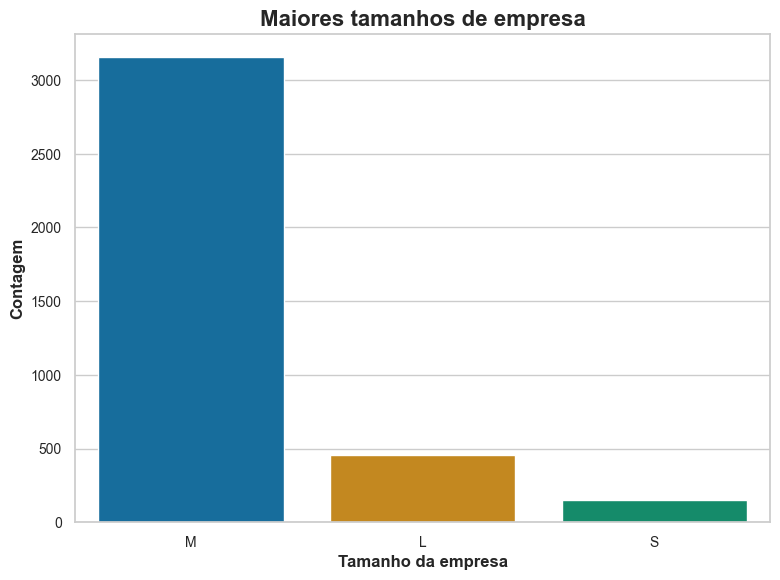

In [137]:
#Variável tamanhos de empresas
top_company_size = df['company_size'].value_counts(ascending = False)

#Gráfico de barras
sns.barplot(top_company_size, palette= 'colorblind')

#Títulos e eixos 
plt.title('Maiores tamanhos de empresa')
plt.xlabel('Tamanho da empresa')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

**Análise tamanho da empresa**

- Na distribuição dos níveis de tamanho de empresa a categoria M (Média) se destaca das demais, com cerca de 3200 registros.
  
- As categorias L (Grande) e S (Pequena) são as subsequentes,respectivamente, com menos de 1000 registros na nossa base de dados.

#### **Análise Bivariada**


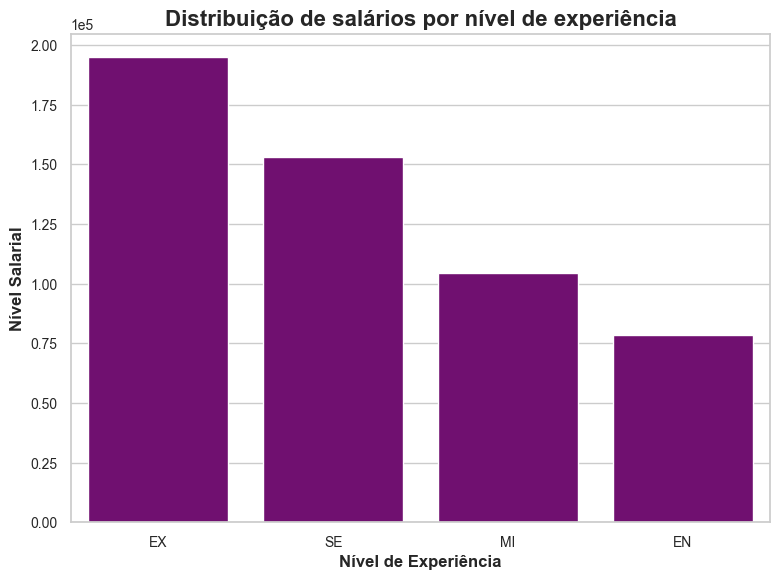

In [138]:
#Salário por nível de experiência
salary_experience = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending= False)

#Gráfico de barras
sns.barplot(salary_experience, color = 'purple')

#Título e eixos 
plt.title('Distribuição de salários por nível de experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Nível Salarial')

plt.tight_layout()
plt.show()

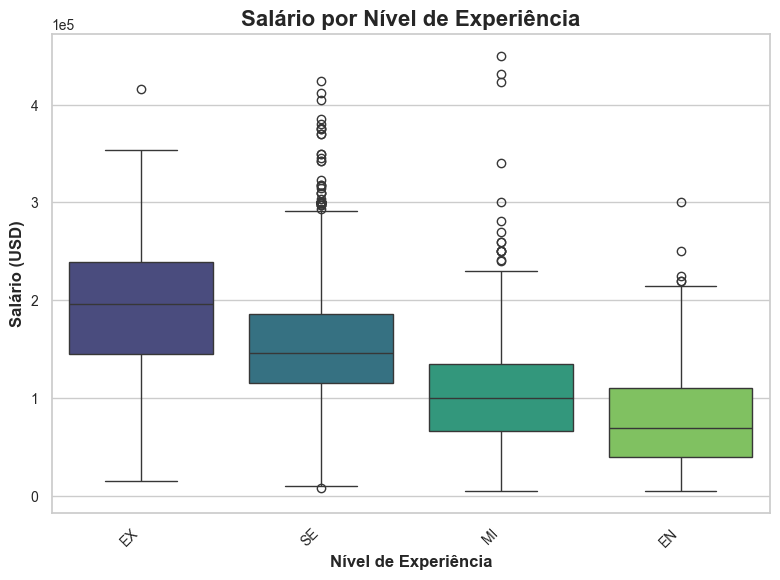

In [139]:
#Boxplot
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette='viridis', 
            order = salary_experience.index)

#Títulos e eixos
plt.title('Salário por Nível de Experiência', fontsize=16)
plt.xlabel('Nível de Experiência', fontsize=12)
plt.ylabel('Salário (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Análise**:

- Conforme os dois gráficos de distribuição de Salário por Nível de Experiência, a categoria EX (Executivo) é a mais bem remunerada com a mediana em torno de $190,000.

- As demais categorias subsequente, respectivamente, são: SE (Senior) mediana de $150,000, MI (Intermediario) $100,000 
e EN (Inicante) $60,000.

- Além da mediana, a variabilidade dos salários aumenta significativamente para os níveis mais altos de experiência. A faixa salarial para executivos (EX) e sêniores (SE) é mais ampla do que para iniciantes (EN) e intermediários (MI), o que pode refletir a diversidade de responsabilidades e empresas.

- Embora a maioria dos salários mais altos se concentre nos níveis sênior e executivo, a presença de outliers em todas as categorias mostra que, mesmo em níveis de entrada (EN), existem profissionais que podem alcançar salários significativamente acima da média, possivelmente devido a fatores como localização, tipo de empresa ou especialização.

**Correlações**

In [140]:
#Matriz de correlação 
matrix_correlation = num_cols.corr()
print(matrix_correlation)

                     work_year  salary_in_usd  years_of_experience
work_year                 1.00           0.23                 0.18
salary_in_usd             0.23           1.00                 0.41
years_of_experience       0.18           0.41                 1.00


<Axes: >

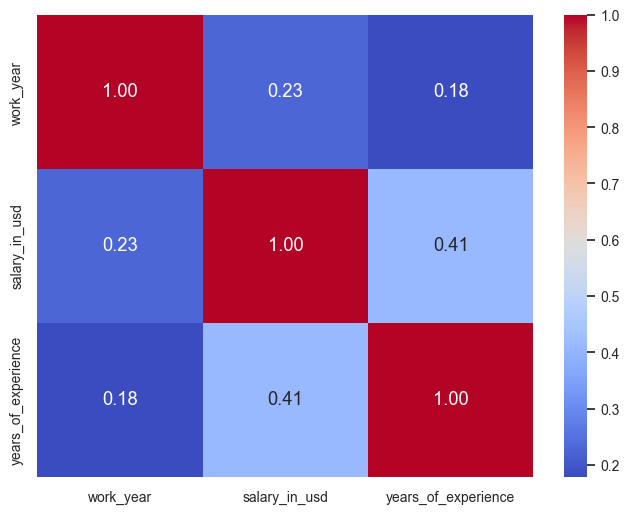

In [141]:
#Heatmap
sns.heatmap(matrix_correlation, annot = True, cmap = 'coolwarm', fmt = '.2f', cbar = True, linecolor = 'black' )

<Axes: xlabel='years_of_experience', ylabel='salary_in_usd'>

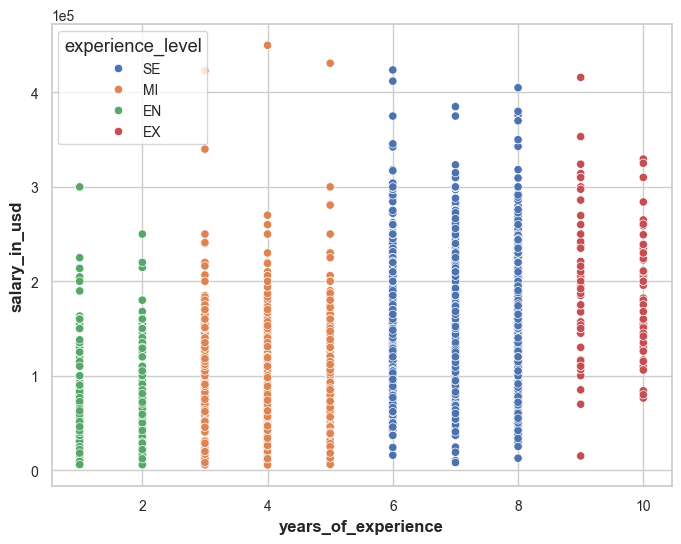

In [142]:
#Scatterplot Salário vs Anos de Experiência 
sns.scatterplot(data= df, x=df['years_of_experience'], y= df['salary_in_usd'], hue = 'experience_level' )

**Análise correlação Salário vs Anos de Experiência:**

- O gráfico mostra uma correlação positiva e moderada entre o salário e os anos de experiência com o coeficiente de correlação de 0.41.

- A "nuvem" de pontos se move para cima à medida que os anos de experiência aumentam, mas com grande dispersão.

- Relação Não Perfeita: A grande dispersão dos pontos valida a correlação moderada, indicando que a experiência é um fator, mas não o único determinante do salário.

- Outliers Visíveis: Os outliers de salário alto, vistos nos gráficos anteriores, são visualizados como pontos isolados no topo do gráfico de dispersão, confirmando que eles correspondem a salários atipicamente altos para seus respectivos anos de experiência.

- No patamar de 6-8 anos de experiência, os salários variam muito porque essa faixa inclui tanto profissionais sênior quanto alguns executivos ou especialistas em cargos de alto nível.

**Variáveis Categóricas vs Categóricas**

In [143]:
# Tabela de Contingência com normalização
tabela_contingencia_norm = pd.crosstab(df['experience_level'], df['company_size'], normalize=True) * 100
print(tabela_contingencia_norm)

company_size        L     M    S
experience_level                
EN               2.66  4.55 1.30
EX               0.35  2.53 0.16
MI               3.57 16.54 1.33
SE               5.51 60.35 1.15


**Análise**:

- Nesta tabela de contingencia podemos ver que profissionais de nível Senior (SE) poussuem 60% de atuação em empresas de médio porte (M).
- Os níveis iniciante e intermediário estão mais uniformemente distribuídos entre os tamanhos de empresa.
- Dos profissionais de nível Executivo, a maior parte está em empresa de médio porte.

In [144]:
#Tabela de contingência com normalização e ordenação
top_5_combinacoes = (pd.crosstab(df['job_title'], df['company_size'], normalize=True) * 100).stack().sort_values(ascending=False).head(5)

print(top_5_combinacoes)

job_title                  company_size
Data Engineer              M              25.38
Data Scientist             M              18.99
Data Analyst               M              14.81
Machine Learning Engineer  M               6.23
Analytics Engineer         M               2.69
dtype: float64


**Análise**
- Nesta tabela de contingencia podemos ver que o cargo mais ocupado é o de Data Engineer, como já visto antes, porem também em empresas de médio porte, seguido por Data Scientist e Data Analyst.

- Cargos mais especializados, como Engenheiros de Machine Learning e Engenheiros de Análise, têm uma presença menor em empresas de médio porte. Isso pode sugerir que essas funções, por serem mais especializadas, podem ter um volume menor de vagas ou são mais comuns em empresas de outros portes (por exemplo, startups de pequeno porte que focam em ML, ou grandes corporações com times dedicados a Analytics Engineering).

**Cramer-V**

In [145]:
#Tabela de contingência com as contagens absolutas
contingency_table = pd.crosstab(df['experience_level'], df['company_size'])

#Calculando Qui-quadrado e o p-valor (necessário para o Cramer V)
chi2, _, _, _ = chi2_contingency(contingency_table)

#Calculando o Cramer V
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramer_v = np.sqrt(phi2 / min(k - 1, r - 1))

# 4. Imprima os resultados
print("Tabela de Contingência:")
print(contingency_table)
print(f"Cramer V: {cramer_v:.4f}")


Tabela de Contingência:
company_size        L     M   S
experience_level               
EN                100   171  49
EX                 13    95   6
MI                134   621  50
SE                207  2266  43
Cramer V: 0.2131


**Análise**

- O valor de Cramer V é 0.2131, o que indica uma correlação fraca entre as variáveis categóricas experience_level e company_size.

In [146]:
#Tabela de contingência com as contagens absolutas
contingency_table = pd.crosstab(df['job_title'], df['company_size'])

#O segundo, terceiro e quarto valores retornados são ignorados com o underscore (_)
chi2, _, _, _ = chi2_contingency(contingency_table)

#Calculando Cramer V
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramer_v = np.sqrt(phi2 / min(k - 1, r - 1))

#Imprima os resultados
print("Tabela de Contingência:")
print(contingency_table)
print(f"Cramer V: {cramer_v:.4f}")

Tabela de Contingência:
company_size                    L    M  S
job_title                                
3D Computer Vision Researcher   0    2  2
AI Developer                    2    6  3
AI Programmer                   1    1  0
AI Scientist                    6    5  5
Analytics Engineer              1  101  1
...                            ..  ... ..
Research Engineer               0   35  2
Research Scientist             15   63  4
Software Data Engineer          1    1  0
Staff Data Analyst              0    1  0
Staff Data Scientist            0    1  0

[93 rows x 3 columns]
Cramer V: 0.3766


**Análise**
- Um valor de 0.3766 indica uma correlação moderada entre as variáveis categóricas job_title e company_size.

- A correlação moderada (0.3766) é um insight que nos diz que ela é mais forte do que a correlação fraca entre experience_level e company_size (0.2131). Isso sugere que o tipo de cargo que uma pessoa ocupa tem uma relação mais forte com o tamanho da empresa do que o seu nível de experiência.